------
### Metis: Project McNulty 
>  Neha Gupta                
>  Date: 2/13/2019
-------

### Import Libraries

In [21]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rfpimp import *

__Reading CSV__

In [22]:
feature_of_all_train_df_clean = pd.read_csv('feature_of_all_train_df_clean.csv')
target_count = feature_of_all_train_df_clean.outcome.value_counts()

__Checking counts of Bots and Human__

In [23]:
target_count

0.0    1881
1.0     103
Name: outcome, dtype: int64

__Checking percentage distribution of counts__

In [24]:
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')

Class 0: 1881
Class 1: 103
Proportion: 18.26 : 1
Percentage of Majority Class: 94.81


__Plot of count distribution__

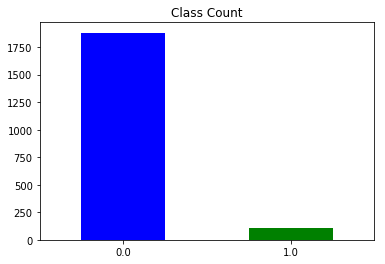

In [25]:
target_count.plot(kind='bar', color=['b', 'g'], title='Class Count', rot=0)
plt.savefig('count') 

In [7]:
X = feature_of_all_train_df_clean.iloc[:, 2:-1]
y = feature_of_all_train_df_clean.outcome

## Oversampling : Smote

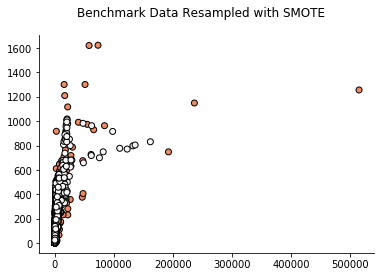

In [8]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass


## Oversampling :  ADASYN

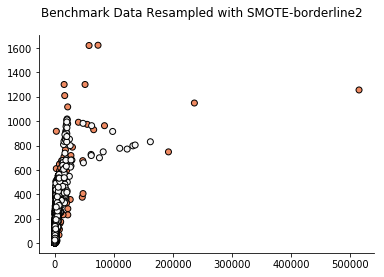

In [9]:
from imblearn.over_sampling import ADASYN

ADASYN_X_resampled, ADASYN_y_resampled = ADASYN().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

[[0.000e+00 1.000e+00]
 [1.881e+03 1.881e+03]]


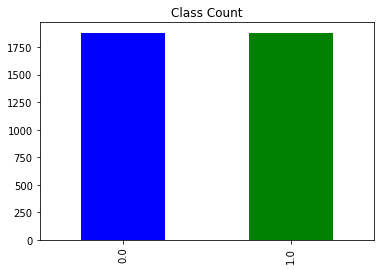

In [26]:
import numpy as np
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
sampled_df = pd.Series(counts_elements, index=unique_elements)
sampled_df.plot(kind='bar', color=['b', 'g'],title='Class Count')
# plot_2d_space(X_resampled, y_resampled, 'SMOTE over-sampling')
plt.savefig('after sampling')